In [293]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests # library to handle requests

<h1 style="color:red">Question 1</h1>
<h2>Step 1</h2>
<p>Read in the website using the pandas read_html function, and then select the very first table in the Wiki page</p>
<p>If the wiki page changes we will have to revisit the code to ensure it still captures the data in the table we are looking for</p>

In [294]:
url = r"https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
tables = pd.read_html(url) # Returns list of all tables on page
canada_postcodes = tables[0] # Select table of interest

<h2>Step 2</h2>
<p>We want to get rid of all rows where the Borough is not assigned, then we want to merge all of the neighbourhoods together for the same Postocde, we achieve this by using the grou¨pby functionality in pandas.</p>
<p>This is followed up by formatting and cleaning up the neighbourhood list and merging it into the Postcode and Borough data.</p>

In [295]:
emptyBorough = canada_postcodes[canada_postcodes['Borough'] == "Not assigned" ].index
canada_postcodes.drop(emptyBorough, inplace=True)
canada_postcodes.reset_index(drop=True, inplace = True)
canada_postcodes = canada_postcodes.groupby(['Postcode','Borough'])['Neighbourhood']

canada_postcodes2 = pd.DataFrame(data=canada_postcodes)

In [296]:
 
df = pd.DataFrame(canada_postcodes2[0].tolist(), columns=['Postcode', 'Borough'])
temp_df = pd.DataFrame(canada_postcodes2[1].values.tolist())
#canada_postcodes2["Postcode"] = (canada_postcodes2[0][0])

<p>We need to reindex temp_df so that we can merge it later on with df</p>

In [297]:
temp_df.reset_index(inplace=True)

In [298]:
df['Neighbourhood'] = temp_df[temp_df.columns[1:]].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1)

In [299]:
df

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [300]:
df.shape

(103, 3)

<h1 style="color:red">Question 2</h1>
<p>We now want to add the latitude and longitude to the dataframe. We do this by using the csv files supplied in the assignment and applying a join on the two dataframes. The join will succeed if we make sure that the keys are identically named, so we first ename the key (column) for the new DataFrame that we created out of the csv file.</p>

In [301]:
#import geocoder # import geocoder
geocodes_df = pd.read_csv("https://cocl.us/Geospatial_data")

In [302]:
geocodes_df.rename({"Postal Code": "Postcode"}, axis=1, inplace = True)
df = pd.merge(df, geocodes_df, on='Postcode')

In [303]:
df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


<h1 style="color:red">Question 3</h1>
<p>Exploring the various Boroughs in Toronto and visualizing them...</p>
<ul>
    <li>Firstly I want to postcodes the boroughs across the Toronto area first by plotting markers on a map of Canada</li>
    <li>Secondly we will build a predictor to classify latitude and longitudes to a Borough. The clustering will be done by using a distance metric</li>
    </ul>



In [304]:
#!conda install -c conda-forge basemap
#!conda install -c conda-forge matplotlib

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


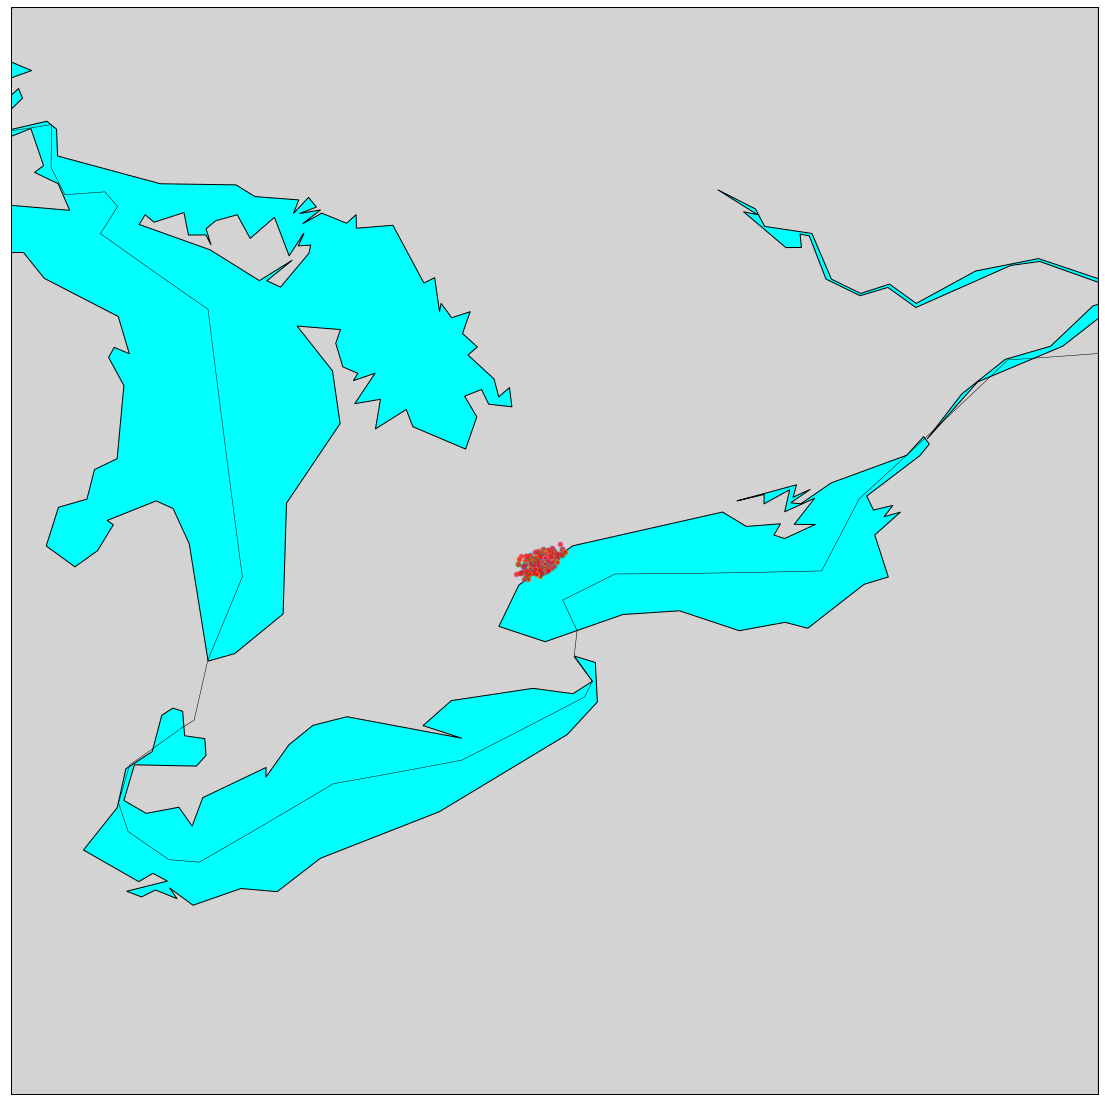

In [305]:
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
%matplotlib inline

llon=-140
ulon=-50
llat=40
ulat=60

fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='lcc', resolution='l', 
            lat_0=43.794200, lon_0=-79.262029,
            width=8.05E5, height=8.05E5)

for index,row in df.iterrows():
    x, y = m(row[4], row[3])
    plt.plot(x, y,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()
m.drawmapboundary(fill_color='blue')
m.fillcontinents(color='lightgray',lake_color='aqua')
plt.show()

Next up we want to build a classifier trained on part of the postcode data, then once that is built we will evaluate the classifier strength by running the test set through the classifier to identify

In [306]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


X= df[["Latitude", "Longitude"]]
y= df["Borough"].values
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2)

X = preprocessing.StandardScaler().fit(X).transform(X)
# preprocess after the split because I want to retain the original latitude and longitude to be able to plot it later
train_X_Normalized= preprocessing.StandardScaler().fit(train_X).transform(train_X)
test_X_Normalized= preprocessing.StandardScaler().fit(test_X).transform(test_X)

Let´s evaluate the predictor on the test set first, and then on the entire training set

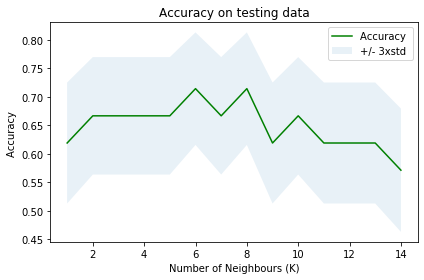

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:32: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:32: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:32: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:32: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:32: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:32: DeprecationWarning: elementwise == comparison failed; th

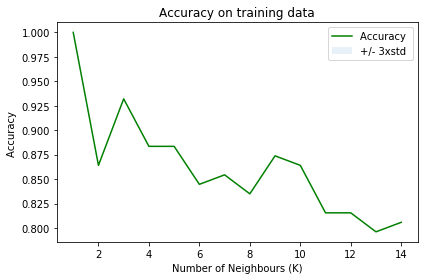

In [307]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_X_Normalized,train_y)
    yhat=neigh.predict(test_X_Normalized)
    mean_acc[n-1] = metrics.accuracy_score(test_y, yhat)
    std_acc[n-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.title('Accuracy on testing data')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

# Now let´s repeat this on the training set
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X,y)
    yhat=neigh.predict(X)
    mean_acc[n-1] = metrics.accuracy_score(y, yhat)
    std_acc[n-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.title('Accuracy on training data')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

Let´s take K=3 for our classifier as it has a good performance on both the test and training set. I wanted to evaluate the classifier on the entire training set to be sure that we are not biasing the classifier against the random test and train set, which might be possible due to the small sample size and small dataset.

In [308]:
neigh = KNeighborsClassifier(n_neighbors = 3).fit(train_X_Normalized,train_y)
test_X.reset_index(inplace=True)

Let´s identify which areas are misclassified when using the training set to build the classifier
<ul>
    <li>RED is for misclassified elements</li>
    <li>PURPLE is for training elements</li>
    <li>GREEN is for correctly classified elements</li>

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


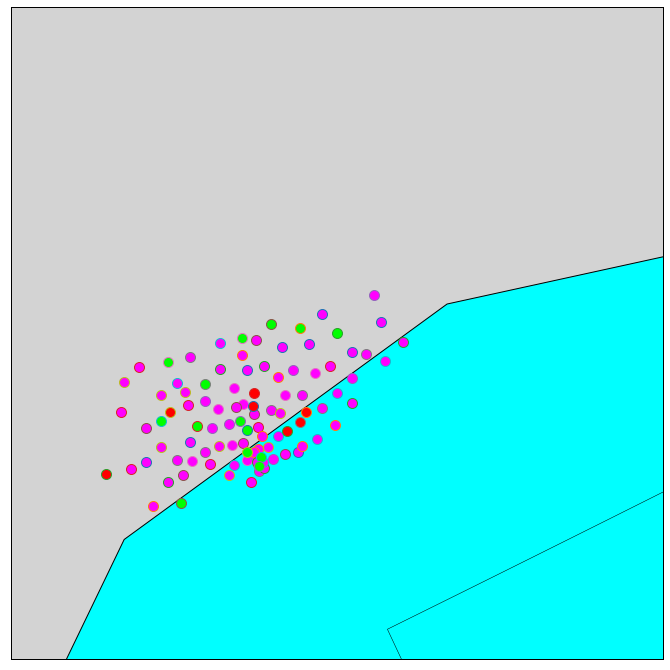

In [310]:
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='lcc', resolution='l', 
            lat_0=43.794200, lon_0=-79.262029,
            width=8.05E4, height=8.05E4)
   
for index, row in train_X.iterrows():
    x, y = m(row["Longitude"], row['Latitude'])
    plt.plot(x, y,markerfacecolor =([1,0,1]),  marker='o', markersize= 10, alpha = 1)
    
for index, row in test_X.iterrows():
    x, y = m(row["Longitude"], row['Latitude'])    
    result = neigh.predict(test_X_Normalized[index].reshape(1, -1))
    if (result == test_y[index]):
        plt.plot(x, y,markerfacecolor =([0,1,0]),  marker='o', markersize= 10, alpha = 1)
    else :
        plt.plot(x, y,markerfacecolor =([1,0,0]),  marker='o', markersize= 10, alpha = 1)
    

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()
m.drawmapboundary(fill_color='blue')
m.fillcontinents(color='lightgray',lake_color='aqua')
plt.show()